In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  glob
import seaborn as sns
import re
from io import StringIO

sns.set_palette("husl")

tocategory = lambda col: pd.Categorical(col)
underscoretospace = lambda x: x.replace("_", " ") if type(x) is str else x
def q5(x): return x.quantile(.05)
def q95(x): return x.quantile(.95)

In [2]:
filenames = glob.glob("data/initial/*/lsb.*.r*")
#filenames = glob.glob("data/incremental/*/lsb.*.r*")
params = ["Algorithm", "Max threads", "Graph nodes"];

def remove_space(filename):
    with open(filename) as f:
        return re.sub(" +", ' ', f.read())

files = [StringIO(remove_space(filename)) for filename in filenames]

In [3]:
def get_df(file):
    return (pd
      .read_csv(file, sep=" ", comment="#", skipinitialspace=True, index_col="id")
      .applymap(underscoretospace)
      .dropna("columns", "all")
    )
df = pd.concat(get_df(file) for file in files)
df[["Algorithm", "Graph_name"]] = df[["Algorithm", "Graph_name"]].apply(tocategory)
df.columns = df.columns.map(underscoretospace)
df['Graph'] = df.apply(lambda x: (x['Graph name'], x['Graph nodes']), 1)
df["Throughput"] = 1/df["time"]

In [4]:
df.head(5)

,Algorithm,Graph nodes,Graph name,Max threads,run,time,overhead,Graph,Throughput
id,,,,,,,,,
0,Filter Kruskal,10000,Preferential attachment 50 edges per vertice,1,0,32210.161194,0,"(Preferential attachment 50 edges per vertice,...",0.000031
0,Filter Kruskal,10000,Preferential attachment 50 edges per vertice,1,1,31414.324036,0,"(Preferential attachment 50 edges per vertice,...",0.000032
0,Filter Kruskal,10000,Preferential attachment 50 edges per vertice,1,2,32242.397827,1,"(Preferential attachment 50 edges per vertice,...",0.000031
0,Filter Kruskal,10000,Preferential attachment 50 edges per vertice,2,0,26022.237000,0,"(Preferential attachment 50 edges per vertice,...",0.000038
0,Filter Kruskal,10000,Preferential attachment 50 edges per vertice,2,1,31260.217224,1,"(Preferential attachment 50 edges per vertice,...",0.000032


In [5]:
df.tail(5)

,Algorithm,Graph nodes,Graph name,Max threads,run,time,overhead,Graph,Throughput
id,,,,,,,,,
0,Filter Kruskal,100000,Erdos-Renyi random,16,1,88482.005859,0,"(Erdos-Renyi random, 100000)",0.000011
0,Filter Kruskal,100000,Erdos-Renyi random,16,2,90793.824951,0,"(Erdos-Renyi random, 100000)",0.000011
0,Filter Kruskal,100000,Erdos-Renyi random,32,0,112364.854248,0,"(Erdos-Renyi random, 100000)",0.000009
0,Filter Kruskal,100000,Erdos-Renyi random,32,1,127591.381592,15,"(Erdos-Renyi random, 100000)",0.000008
0,Filter Kruskal,100000,Erdos-Renyi random,32,2,135814.080322,0,"(Erdos-Renyi random, 100000)",0.000007


In [6]:
timequantiles = df.groupby(params).agg([q5, q95])["time"]
df_timequantiles =  timequantiles.loc[map(tuple, df[params].values)]

In [7]:
summary = (df[params + ["time"]]
    [(df.time >= df_timequantiles["q5"].values) & (df.time <= df_timequantiles["q95"].values)]
    .groupby(params).agg(["median", "mean", "min", "max", "std"])
)

In [8]:
summary

time                \
                                                  median          mean   
Algorithm          Max threads Graph nodes                               
Boost Kruskal      1           1000         5.840215e+03  6.100872e+03   
                               10000        3.087614e+05  2.433071e+05   
                               100000       5.847199e+06  4.779661e+06   
                               1000000      4.115117e+07  4.115117e+07   
                               1524453      7.864248e+06  7.853586e+06   
                   2           1000         5.256570e+03  5.258305e+03   
                               10000        3.061399e+05  2.336276e+05   
                               100000       5.850888e+06  4.614522e+06   
                               1000000      4.195581e+07  4.195581e+07   
                               1524453      8.191644e+06  8.202367e+06   
                   4           1000         5.247090e+03  5.263195e+03   
                               10000        3.055102e+05  2.328170e+05   
                               100000       5.858102e+06  4.586805e+06   
                               1000000      4.166771e+07  4.166771e+07   
                               1524453      8.240592e+06  8.238509e+06   
                   8           1000         5.274718e+03  5.276331e+03   
                               10000        3.056576e+05  2.357494e+05   
                               100000       5.863079e+06  4.617201e+06   
                               1000000      4.224937e+07  4.224937e+07   
                               1524453      8.528016e+06  8.435663e+06   
                   16          1000         5.270018e+03  5.282278e+03   
                               10000        3.061137e+05  2.320500e+05   
                               100000       5.871454e+06  4.626168e+06   
                               1000000      4.209121e+07  4.209121e+07   
                               1524453      8.668605e+06  8.635834e+06   
                   32          1000         5.291797e+03  5.300105e+03   
                               10000        3.068859e+05  2.348533e+05   
                               100000       5.889019e+06  4.607726e+06   
                               1000000      4.226889e+07  4.226889e+07   
                               1524453      8.426694e+06  8.590995e+06   
...                                                  ...           ...   
parallel sollin EL 1           1000         3.958650e+04  4.052767e+04   
                               10000        9.385265e+05  1.107093e+06   
                               100000       1.666172e+07  1.870047e+07   
                               264346       1.676761e+06  1.585031e+06   
                               435666       2.162391e+06  2.191565e+06   
                   2           1000         4.616018e+04  4.809312e+04   
                               10000        9.076874e+05  1.037906e+06   
                               100000       2.178059e+07  4.725515e+07   
                               264346       1.475431e+06  4.358684e+06   
                               435666       2.535608e+06  8.485404e+06   
                   4           1000         5.586391e+04  5.911294e+04   
                               10000        1.359250e+06  1.343024e+06   
                               100000       2.423453e+07  5.337617e+07   
                               264346       1.968017e+06  2.440129e+06   
                               435666       2.980635e+06  3.466048e+06   
                   8           1000         8.488604e+04  8.510719e+04   
                               10000        1.632321e+06  1.876332e+06   
                               100000       3.114718e+07  5.303408e+07   
                               264346       2.484771e+06  2.789395e+06   
                               435666       3.755776e+06  4.287606e+06   
                   16          1000         1.199653e+05

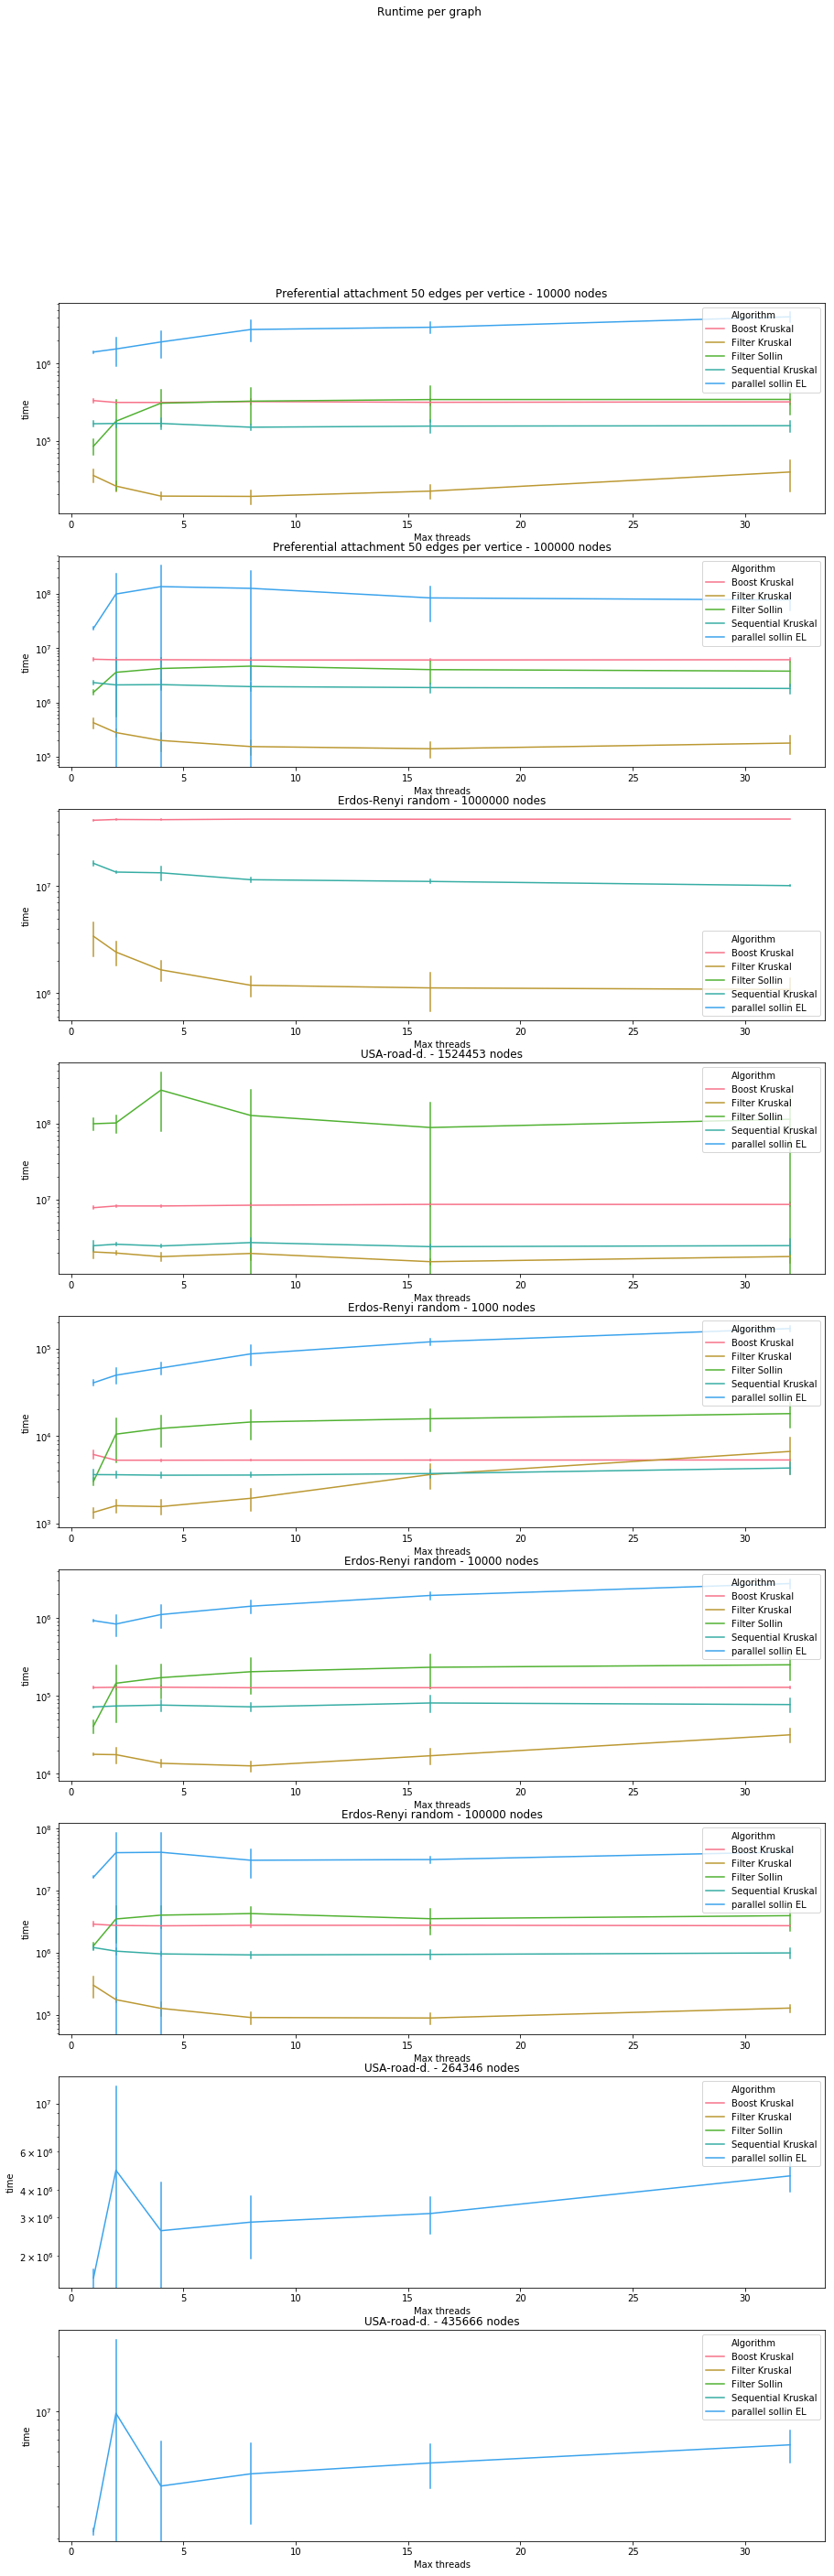

In [9]:
fig, ax = plt.subplots(nrows=len(df.Graph.unique()),figsize=(15,5*len(df.Graph.unique())))
for i, e in enumerate(df.Graph.unique()):
    sns.lineplot(
        ax=ax[i], 
        data=df[df.Graph == e], 
        x="Max threads", 
        y="time", 
        hue="Algorithm",
        markers=True,
        ci="sd",
        err_style="bars",
    ).set(yscale="log")
    ax[i].set_title(f"{e[0]} - {e[1]} nodes")
    #ax[i].set_ylim(1,)
plt.suptitle("Runtime per graph")
plt.show()

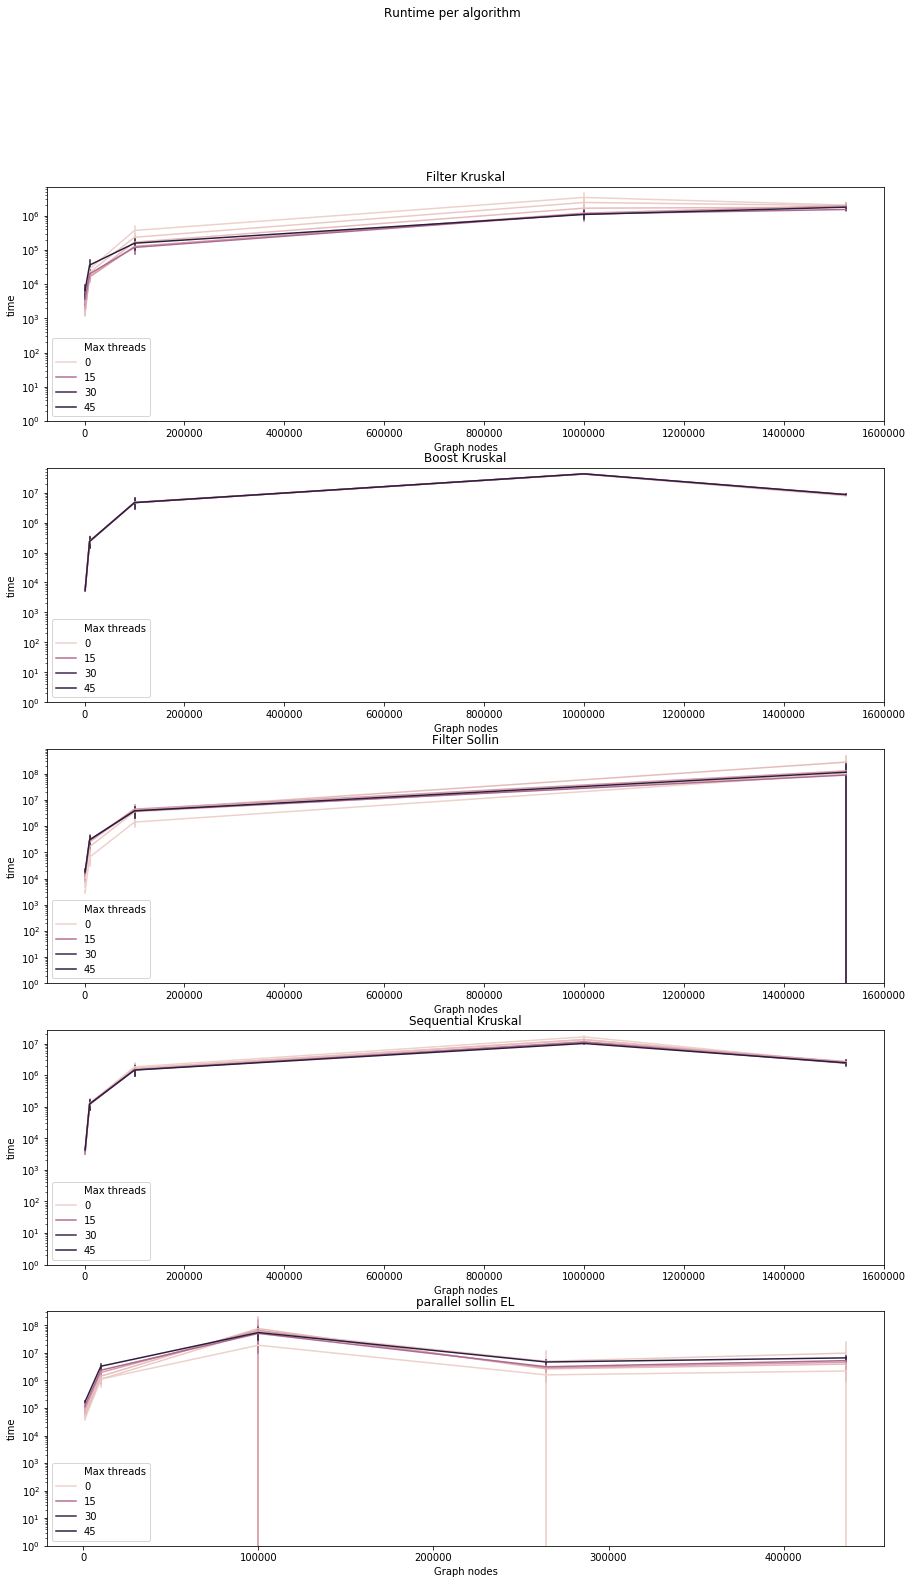

In [10]:
fig, ax = plt.subplots(nrows=len(df["Algorithm"].unique()),figsize=(15,5*len(df["Algorithm"].unique())))
for i, e in enumerate(df["Algorithm"].unique()):
    sns.lineplot(
        ax=ax[i], 
        data=df[df["Algorithm"].values == e], 
        x="Graph nodes", 
        y="time", 
        hue="Max threads",
        markers=True,
        ci="sd",
        err_style="bars",
    ).set(yscale="log")
    ax[i].set_title(f"{e}")
    ax[i].set_ylim(1,)
plt.suptitle("Runtime per algorithm")
plt.show()

In [11]:
g_idx = ["Graph nodes", "Graph name"]
graphs = df[g_idx].drop_duplicates().values

/opt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


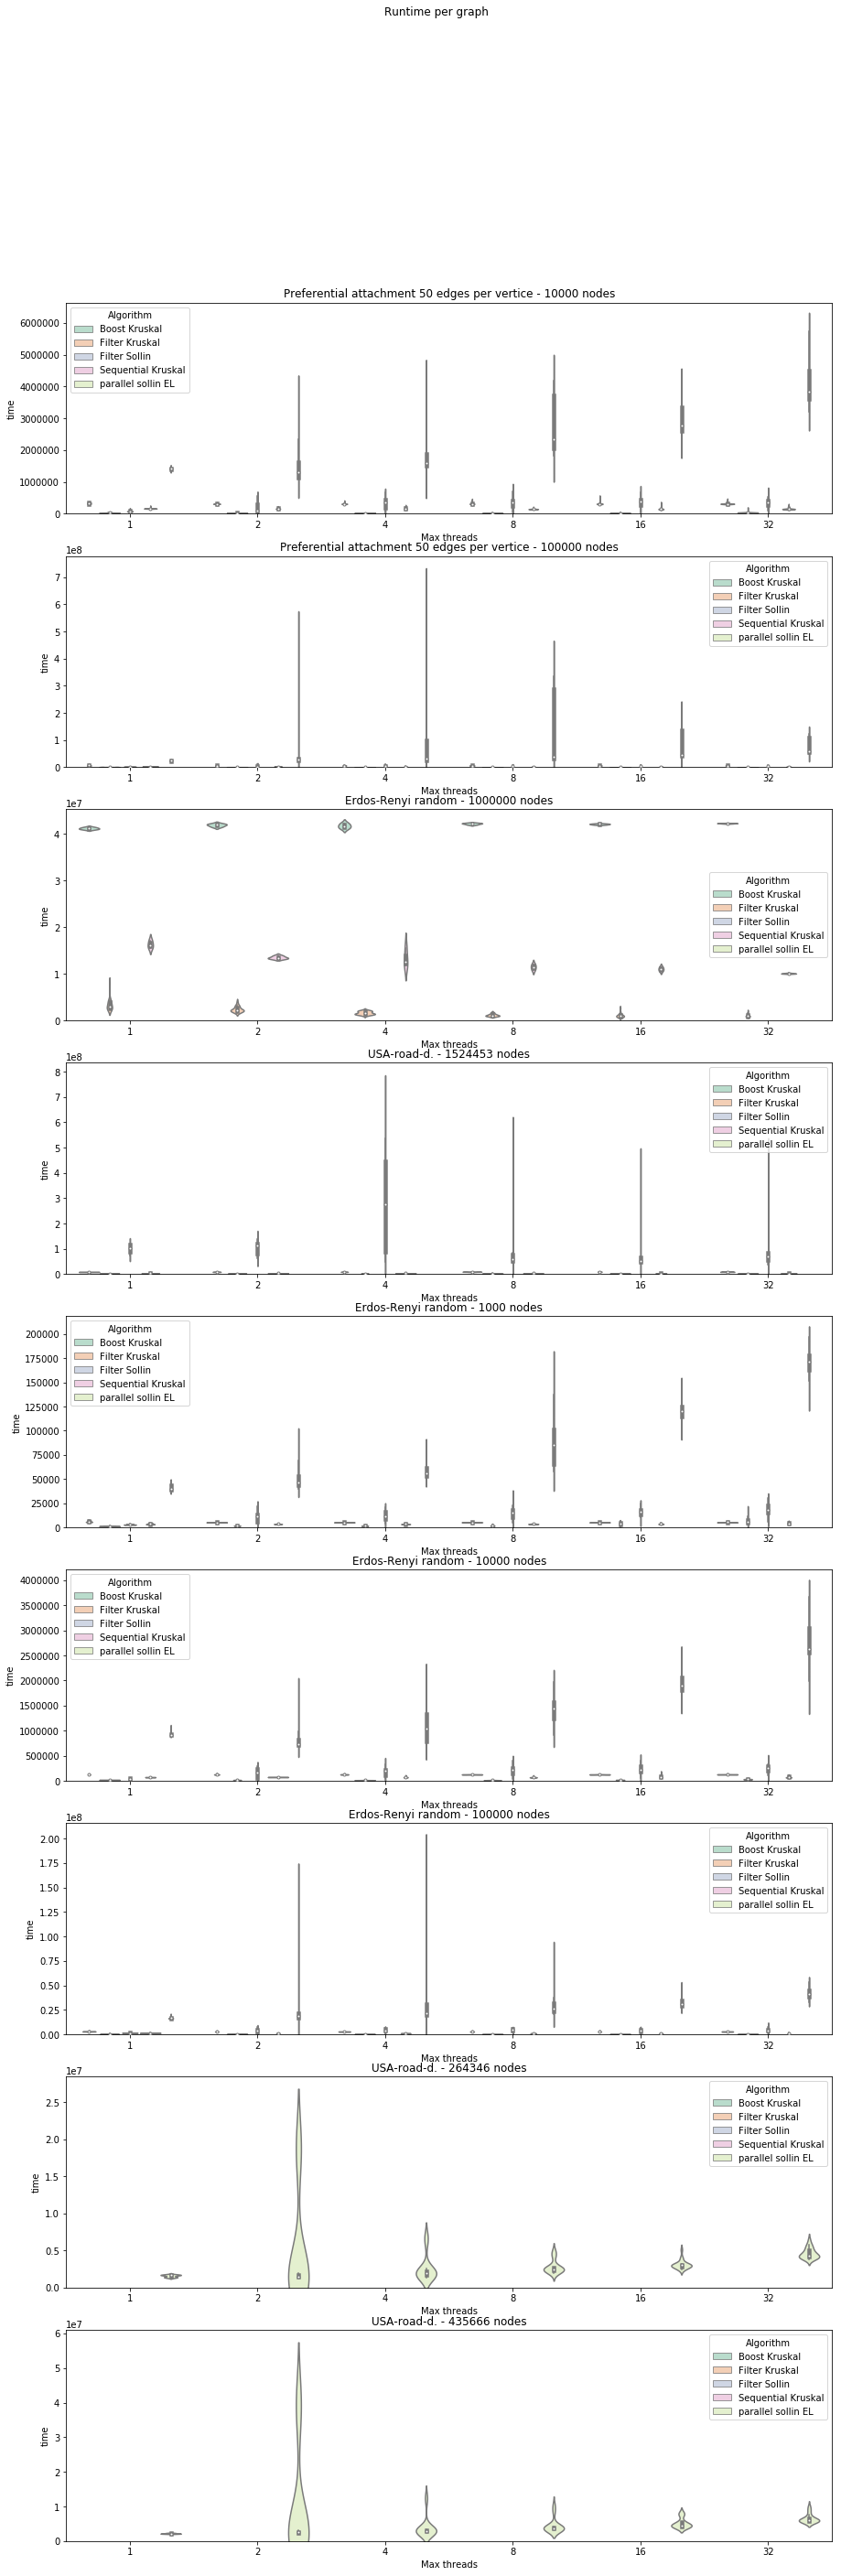

In [12]:
fig, ax = plt.subplots(nrows=len(df.Graph.unique()),figsize=(15,5*len(df.Graph.unique())))
for i, e in enumerate(df.Graph.unique()):
    sns.violinplot(
        x="Max threads", y="time", hue="Algorithm", 
        data=df[df.Graph == e], 
        palette="Pastel2", ax=ax[i]
    )
    ax[i].set_title(f"{e[0]} - {e[1]} nodes")
    ax[i].set_ylim(0,)
plt.suptitle("Runtime per graph")
plt.show()

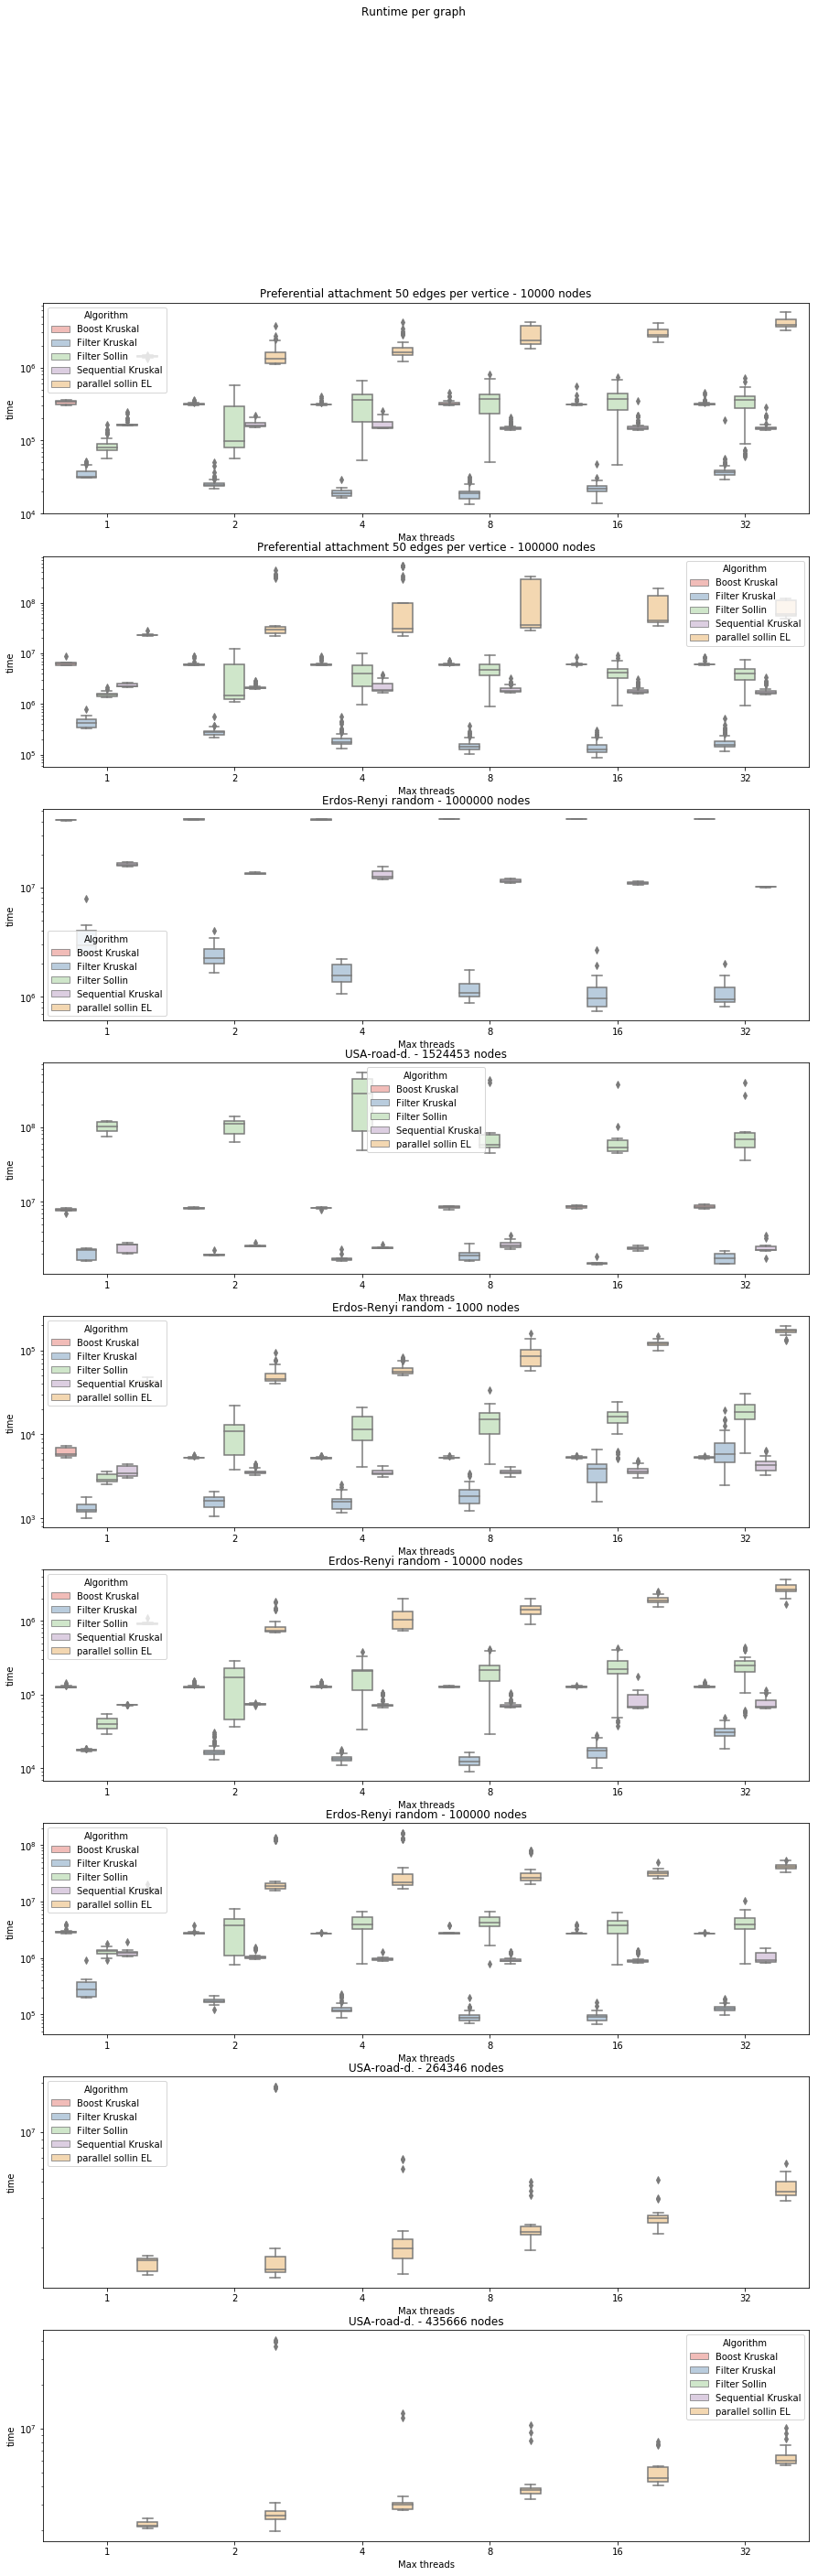

In [13]:
fig, ax = plt.subplots(nrows=len(df.Graph.unique()),figsize=(15,5*len(df.Graph.unique())))
for i, e in enumerate(df.Graph.unique()):
    sns.boxplot(
        x="Max threads", y="time", hue="Algorithm", 
        data=df[df.Graph == e], 
        palette="Pastel1", ax=ax[i]
    ).set(yscale="log")
    ax[i].set_title(f"{e[0]} - {e[1]} nodes")
plt.suptitle("Runtime per graph")
plt.show()

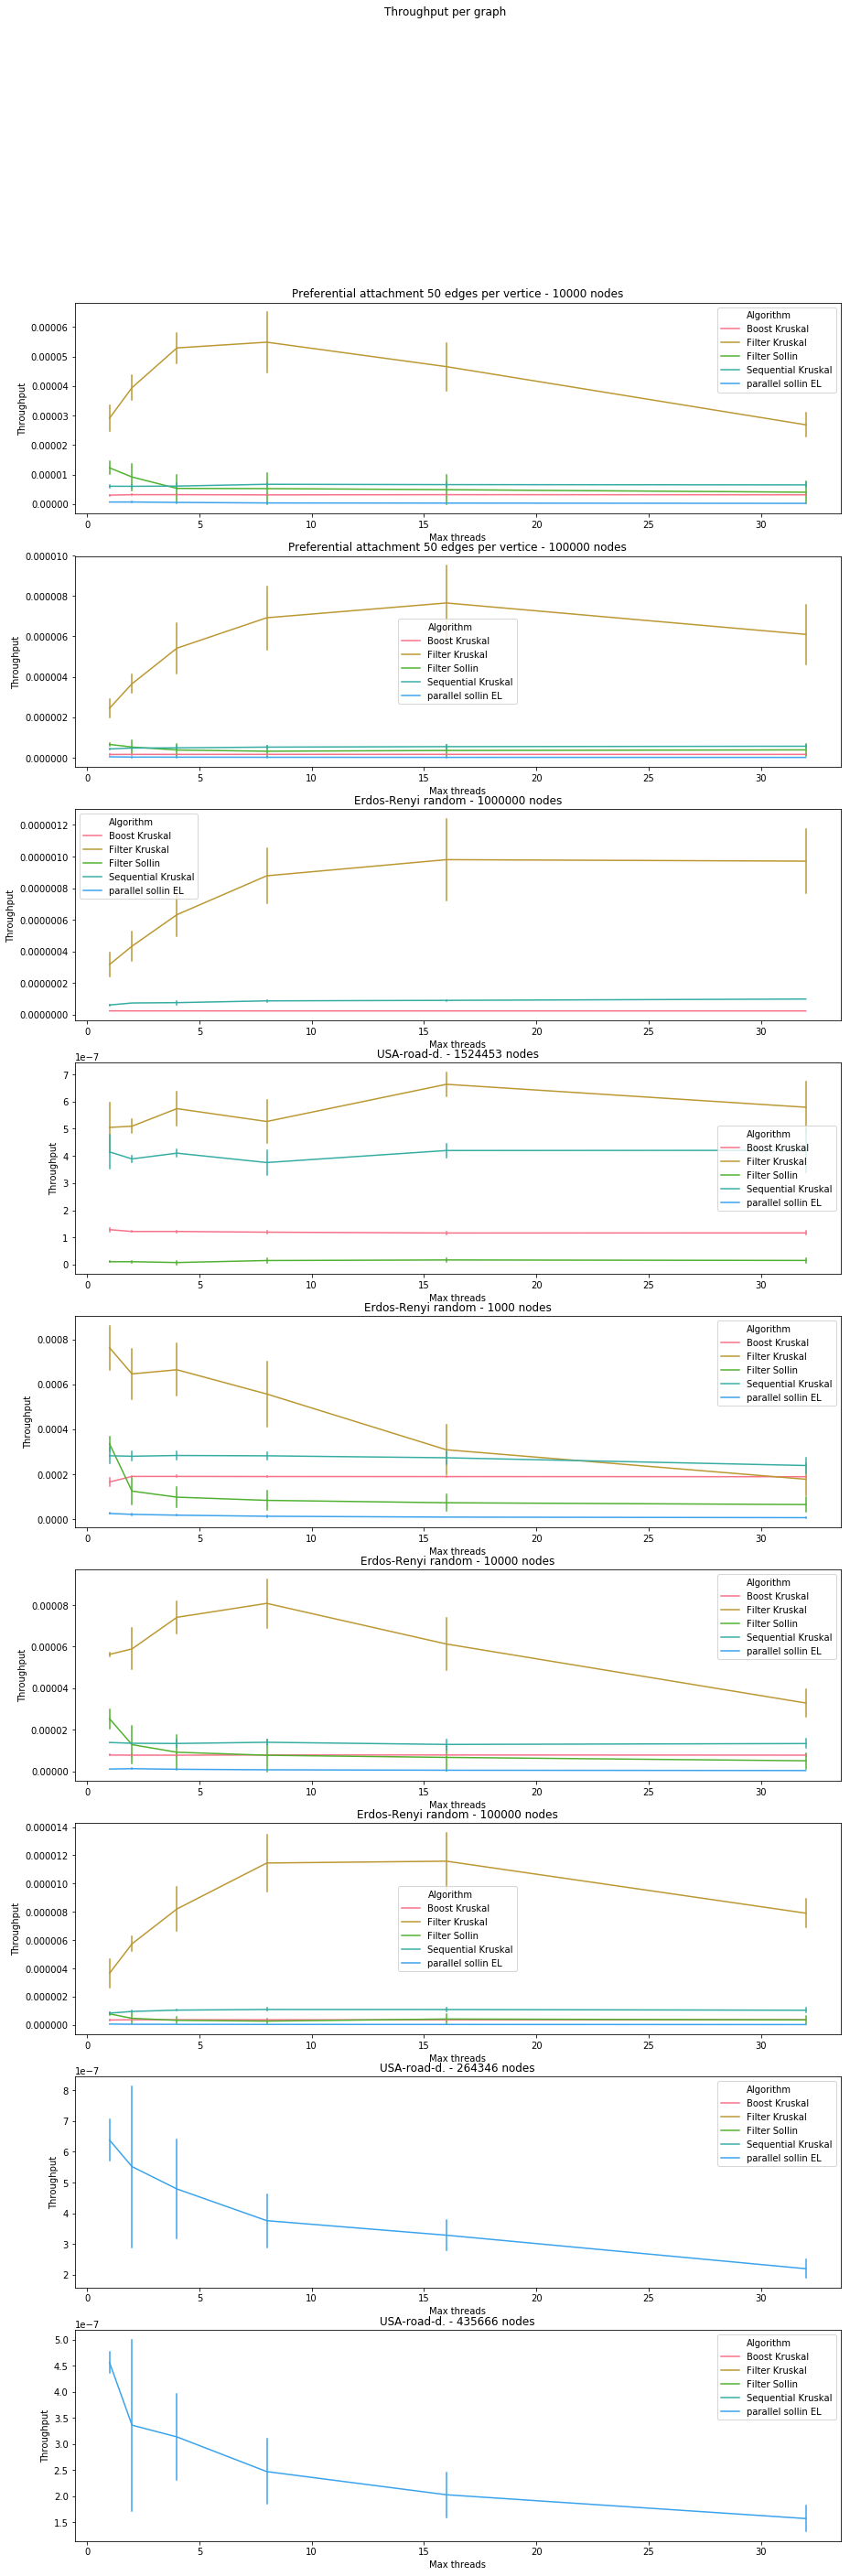

In [14]:
fig, ax = plt.subplots(nrows=len(df.Graph.unique()),figsize=(15,5*len(df.Graph.unique())))
for i, e in enumerate(df.Graph.unique()):
    sns.lineplot(
        ax=ax[i], 
        data=df[df.Graph == e], 
        x="Max threads", 
        y="Throughput", 
        hue="Algorithm",
        markers=True,
        ci="sd",
        err_style="bars",
    )#.set(yscale="log")
    ax[i].set_title(f"{e[0]} - {e[1]} nodes")
    #ax[i].set_ylim(1,)
plt.suptitle("Throughput per graph")
plt.show()

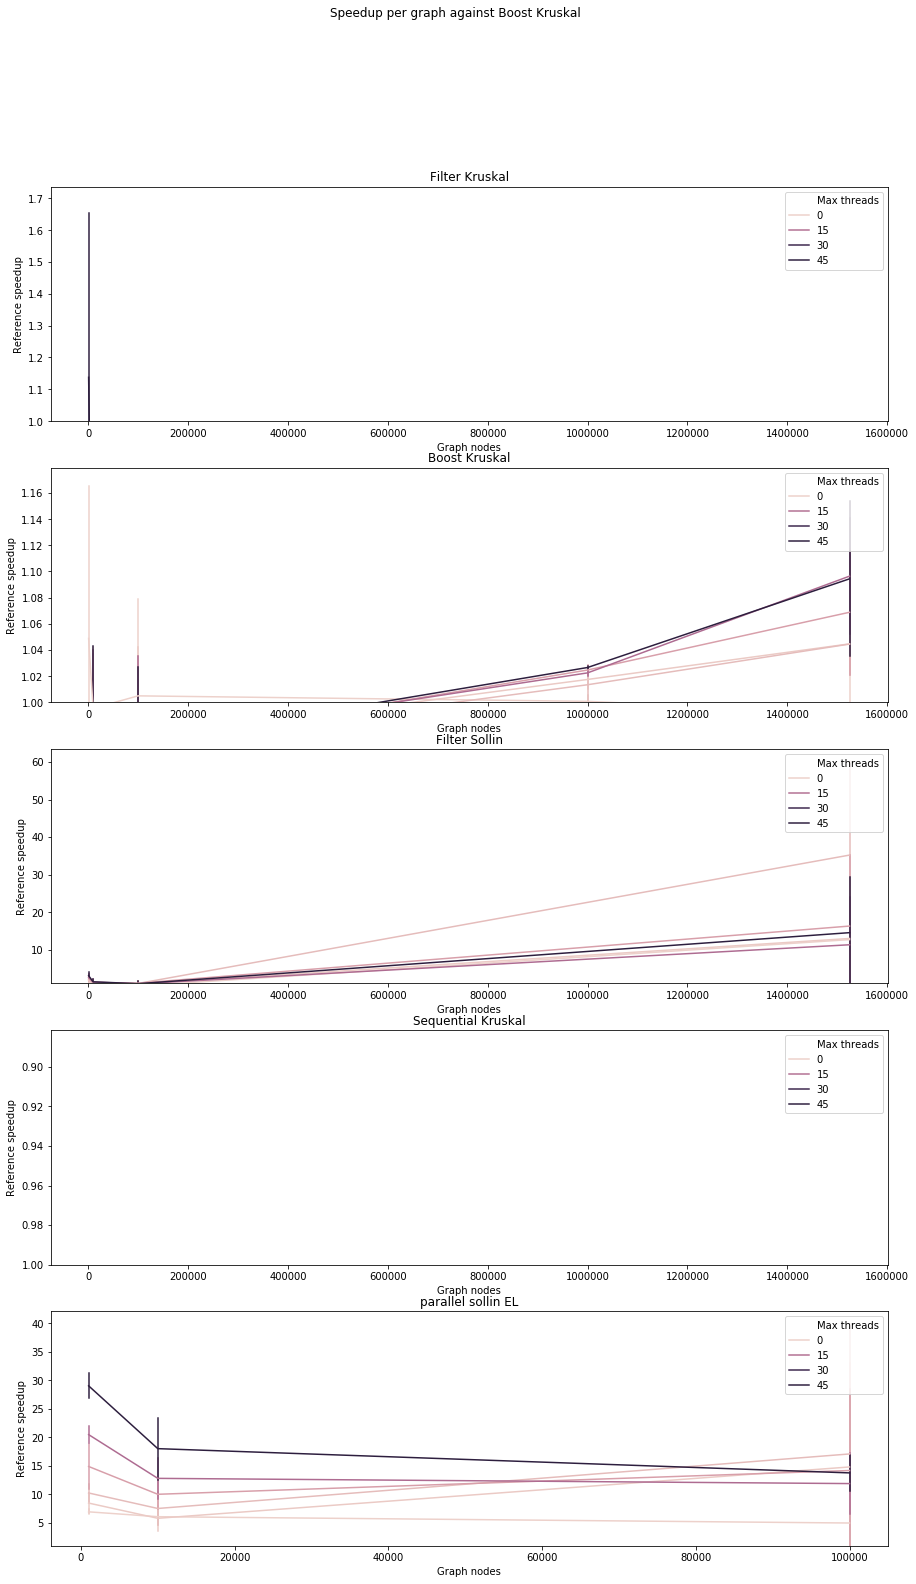

In [15]:
reference_algorithm = "Boost Kruskal"
reference_times = df[(df.Algorithm == reference_algorithm) & (df['Max threads'] == 1)][["Graph", "time"]].groupby('Graph').median()['time']

df['Reference speedup'] = df.apply(lambda x: x.time / reference_times[x.Graph] if x.Graph in reference_times.index else None , 1)

fig, ax = plt.subplots(nrows=len(df.Algorithm.unique()),figsize=(15,5*len(df.Algorithm.unique())))
for i, e in enumerate(df["Algorithm"].unique()):
    sns.lineplot(
        ax=ax[i], 
        data=df[df.Algorithm == e], 
        x="Graph nodes", 
        y="Reference speedup", 
        hue="Max threads",
        ci="sd",
        err_style="bars",
    )#.set(yscale="log")
    ax[i].set_title(f"{e}")
    ax[i].set_ylim(1,)
plt.suptitle(f"Speedup per graph against {reference_algorithm}")
plt.show()

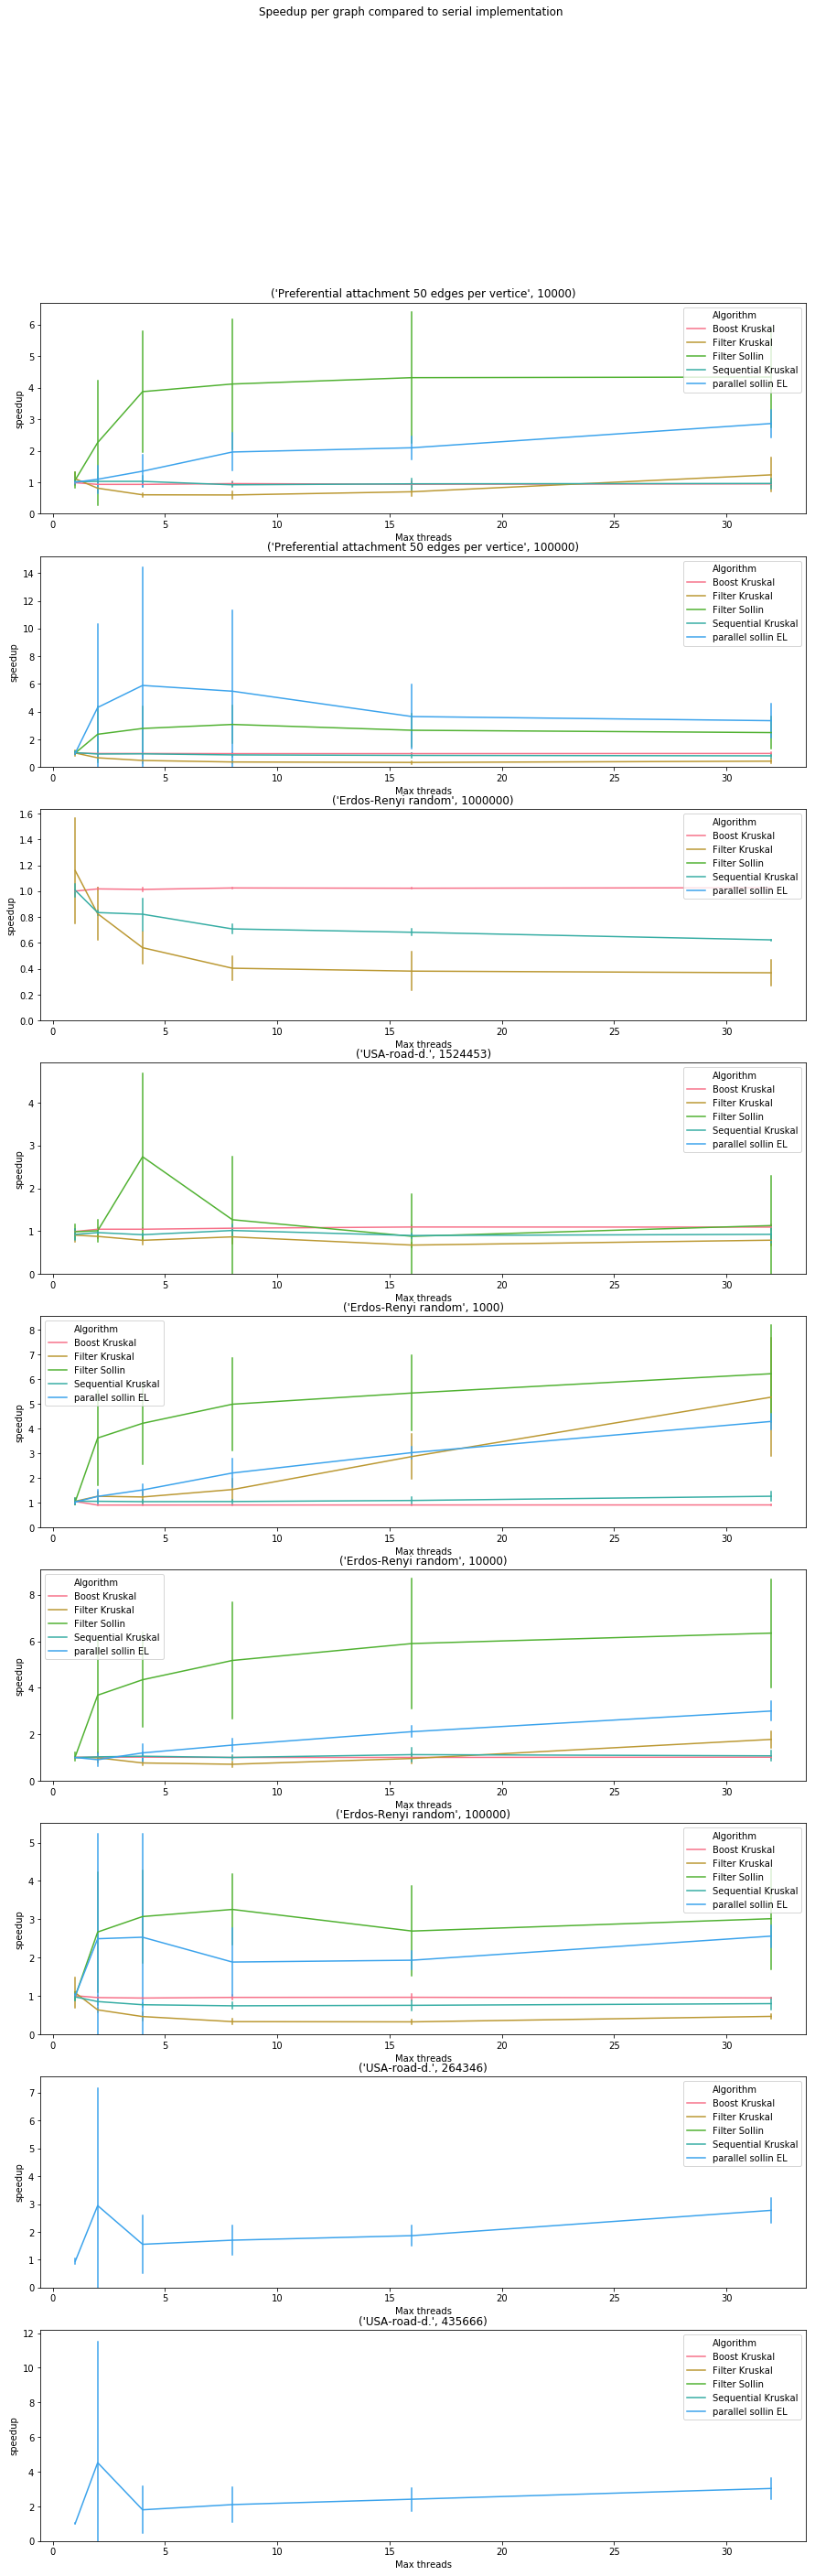

In [16]:
df['speedup'] = df.apply(lambda x: x.time / df[(df.Algorithm == x.Algorithm) & (df.Graph == x.Graph) & (df['Max threads'] == 1)].time.median(), 1)

fig, ax = plt.subplots(nrows=len(df.Graph.unique()),figsize=(15,5*len(df.Graph.unique())))
for i, e in enumerate(df.Graph.unique()):
    sns.lineplot(
        ax=ax[i], 
        data=df[df.Graph == e], 
        x="Max threads", 
        y="speedup", 
        hue="Algorithm",
        ci="sd",
        err_style="bars",
    )#.set(yscale="log")
    ax[i].set_title(f"{e}")
    ax[i].set_ylim(0,)
plt.suptitle(f"Speedup per graph compared to serial implementation")
plt.show()